In [1]:
# uncomment the line below to enable realtime graphs
# %matplotlib ipympl

# as this notebook is run from a subfolder, we need to change the working directory to the root folder
import os

if os.getcwd().split("/")[-1] != "explain-python":
    os.chdir("..")

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("definitions/normal_neonate.json")

# report the gas pressures in kPa
model.set_pressure_unit("kpa")

# get a reference to all the submodels
models = model.models

# instantiate a custom interface object especially designed to interact with the neonatal model engine instance
from interfaces.NeoInterface import NeoInterface

neo = NeoInterface(model)

# enable or disable the physiological submodels which can be enabled or disabled.
neo.ans(True)
neo.breathing(True)
neo.metabolism(True)
neo.mob(True)
neo.pda(False)

# enable or disable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.resuscitation(False)

# stabilize the model by calculating 60 seconds
neo.calculate(60)

 Model 'normal neonate' loaded and initialized correctly.
 Ready in 3.8 sec. Average model step in 0.0315 ms.


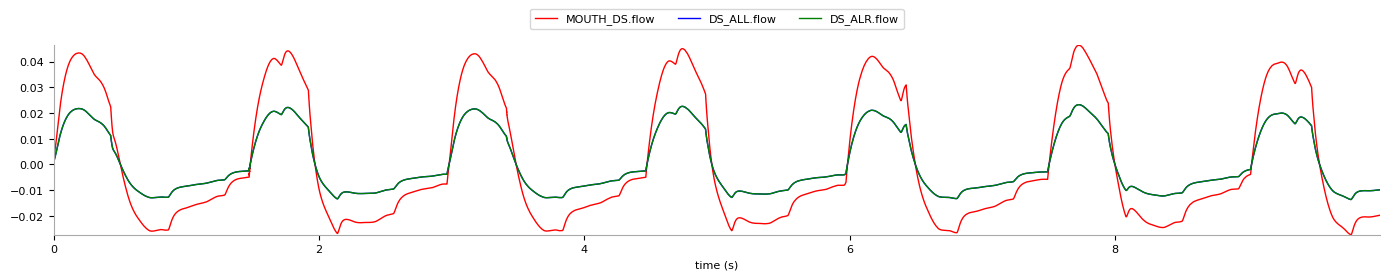

In [2]:
neo.plot_lung_flows()

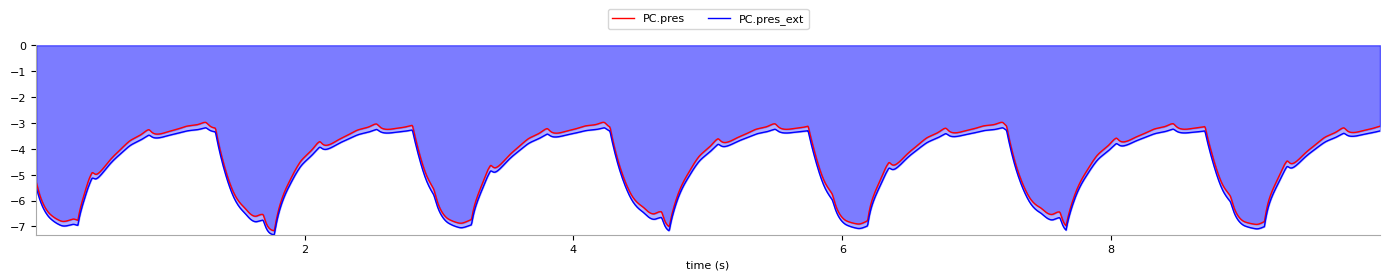

PC.pres         : max   -2.97562, min   -7.16157 mmHg
PC.pres_ext     : max   -3.18706 min   -7.31807


In [5]:
neo.plot_time_graph(["PC.pres", "PC.pres_ext"])

In [3]:
neo.analyze_heart()

AA.pres         : max   70.59727, min   45.40383 mmHg
PA.pres         : max   41.06217, min   17.84038 mmHg
LA_LV.flow      : net  242.65737, forward  242.65737, backward        0.0 ml/kg/min, stroke volume:    1.70884 ml/kg, 
RA_RV.flow      : net  237.19454, forward  237.19454, backward        0.0 ml/kg/min, stroke volume:    1.67037 ml/kg, 
RV_PA.flow      : net  237.66539, forward  237.66539, backward        0.0 ml/kg/min, stroke volume:    1.67369 ml/kg, 
LV_AA.flow      : net  243.10256, forward  243.10256, backward        0.0 ml/kg/min, stroke volume:    1.71198 ml/kg, 
IVCI_RA.flow    : net  133.19416, forward  139.52715, backward   -6.33299 ml/kg/min, stroke volume:    0.93798 ml/kg, 
SVC_RA.flow     : net  104.30484, forward  110.85051, backward   -6.54567 ml/kg/min, stroke volume:    0.73454 ml/kg, 
Pda.flow        : net        0.0, forward          0, backward          0 ml/kg/min, stroke volume:        0.0 ml/kg, 
FO.flow         : net   -2.67671, forward    0.44467, backw

In [2]:
neo.get_bloodgas("AA")

{'ph': 7.400919345495122,
 'po2': 10.055326930429777,
 'pco2': 5.642270029987128,
 'hco3': 25.95713998073779,
 'be': 0.7190060768989445,
 'so2': 95.6774966403038}